# King County Housing 

Business Problem: Real Estate Investment Firm 

columns to avoid according to project intro
- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat 
- long
- sqft_living15
- sqft_lot 15


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor 

In [2]:
#reading in dataframe
kc_house = pd.read_csv('data/kc_house_data.csv', parse_dates=['date'])

In [3]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [5]:
#dropping columns that I don't believe are necessary
kc_house.drop(['lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'id'], axis=1, inplace=True)

#sanity check
kc_house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0,1955,98178
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0,1951,98125
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0,1933,98028
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0,1965,98136
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0,1987,98074


In [6]:
#defining X and y
X = kc_house.drop(columns='price')
y = kc_house['price']

In [7]:
#sanity check
print(X.shape)
X.head()

(21597, 13)


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,2014-10-13,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0,1955,98178
1,2014-12-09,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0,1951,98125
2,2015-02-25,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0,1933,98028
3,2014-12-09,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0,1965,98136
4,2015-02-18,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0,1987,98074


In [8]:
print(y.shape)
y.head()

(21597,)


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [9]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
#creating a train df and test df
train_kch = pd.concat([X_train, y_train], axis=1)
test_kch = pd.concat([X_test, y_test], axis=1)

-----------------

## EDA King Count House - training

In [11]:
#from now on using train_kch to make model decision
#sanity check
train_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,price
19709,2014-10-29,5,3.75,3330,5042,2.0,NaN,Average,9 Better,2470,860.0,2014,98103,1380000.0
4800,2015-05-05,3,2.00,1678,13862,1.0,NO,Average,7 Average,1678,0.0,1994,98030,353000.0
13225,2014-10-27,4,1.00,1550,15239,1.5,YES,Average,6 Low Average,1370,180.0,1930,98166,685000.0
16111,2014-08-29,3,2.50,2760,9471,1.0,NO,Average,8 Good,1760,1000.0,1956,98115,800000.0
17711,2015-02-18,2,1.50,1400,5810,2.0,NO,Average,7 Average,1400,0.0,1940,98103,575000.0


In [12]:
#null-value check
train_kch.isna().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1556
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
price               0
dtype: int64

From here we can see that there is a significant missing values in the waterfront column - let's look at their specific value counts to see if we can impute any of this values

In [13]:
train_kch['waterfront'].value_counts()

NO     12812
YES      101
Name: waterfront, dtype: int64

Just a simple yes or no a categorical variable for waterfront 1156 missing out of 14469 0.07% --> can drop missing values.

Keep waterfront since curious to see the relationship that it has with price

In [14]:
#dropping missing values from waterfront
train_kch = train_kch.dropna().reset_index(drop=True)

#sanity check
train_kch.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
price            0
dtype: int64

Now to take a deeper look at the sqft_basement column since it seems it should be numeric instead of categorical.

In [15]:
#changes the dtypes of date and sqft_basement
train_kch['sqft_basement'].value_counts()

0.0       7641
?          281
600.0      129
500.0      127
700.0      125
          ... 
2730.0       1
2000.0       1
3500.0       1
1284.0       1
515.0        1
Name: sqft_basement, Length: 269, dtype: int64

Interesting find since there is a ? could this mean that there is no basement/unknown. There is already a substantial amount of a values equal to 0.0. Let's take a closer look at sqft_basement to price to see if its worth imputing the missing values for the model.

In [16]:
#first change question mark to 0.0 since could not find anything to what the ? mark mean
train_kch['sqft_basement'] = train_kch['sqft_basement'].str.replace('?', '0.0')

In [17]:
train_kch['sqft_basement'].value_counts()

0.0       7922
600.0      129
500.0      127
700.0      125
400.0      116
          ... 
1284.0       1
556.0        1
2190.0       1
3500.0       1
2250.0       1
Name: sqft_basement, Length: 268, dtype: int64

In [18]:
#changing its dtype from object to float
train_kch['sqft_basement'] = train_kch['sqft_basement'].astype(float)

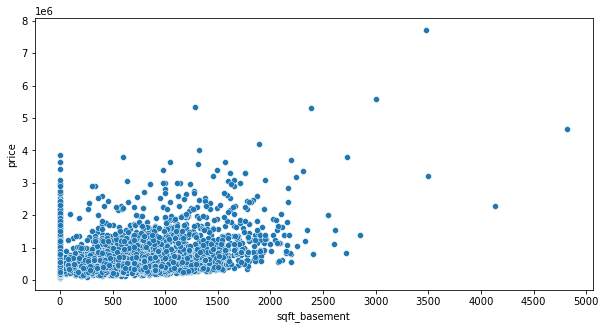

In [19]:
#make a quick plot showing the relationship between sqft_basement and price

plt.figure(figsize=(10, 5))
sns.scatterplot(data=train_kch, x="sqft_basement", y="price")
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]);

There is not a very linear relationship between sqft_basement and price. It already breaks one of the assumptions of Linear Regression; therefore it is not worth having this feature in the final model.

In [20]:
#Now having a look at the different features
train_kch['bedrooms'].value_counts()

3     5821
4     4147
2     1646
5      983
6      153
1      118
7       31
8        7
9        4
10       2
11       1
Name: bedrooms, dtype: int64

In [21]:
#there are some outliers here such as 8 - 11 bedrooms

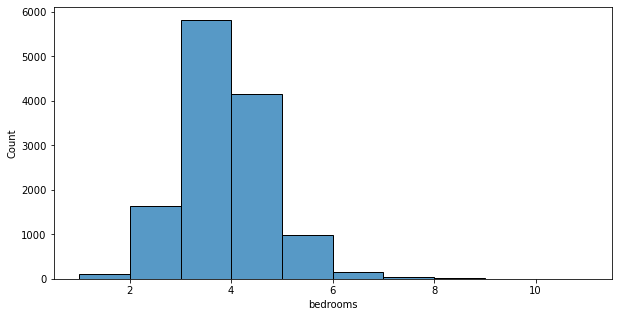

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_kch, x="bedrooms", binwidth=1);

Can have a threshold for the outliers or can just remove the values since taking away those values would give a more general idea; however since we don't have all day will look at a correlation matrix 

Instead and then go from there but will categorical variables first such as condition and grade.

In [23]:
#let's look and see which values are categorical once again 
train_kch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12913 entries, 0 to 12912
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           12913 non-null  datetime64[ns]
 1   bedrooms       12913 non-null  int64         
 2   bathrooms      12913 non-null  float64       
 3   sqft_living    12913 non-null  int64         
 4   sqft_lot       12913 non-null  int64         
 5   floors         12913 non-null  float64       
 6   waterfront     12913 non-null  object        
 7   condition      12913 non-null  object        
 8   grade          12913 non-null  object        
 9   sqft_above     12913 non-null  int64         
 10  sqft_basement  12913 non-null  float64       
 11  yr_built       12913 non-null  int64         
 12  zipcode        12913 non-null  int64         
 13  price          12913 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 1.

From above you see that the categorical variables are: waterfront, condition, and grade. Let's look at the value counts for condition and grade since waterfront was already looked at.

- Condition: How good the overall condition of the house is. Related to maintenance of house.
- Grade: Overall grade of the house. Related to the construction and design of the house.

In [24]:
train_kch['condition'].value_counts() #maintenance of the house -- if you are trying to sell the house

Average      8384
Good         3380
Very Good    1029
Fair          105
Poor           15
Name: condition, dtype: int64

In [25]:
train_kch['grade'].value_counts() #construction and design of the house -- investment 

7 Average        5343
8 Good           3663
9 Better         1541
6 Low Average    1206
10 Very Good      691
11 Excellent      245
5 Fair            146
12 Luxury          56
4 Low              14
13 Mansion          7
3 Poor              1
Name: grade, dtype: int64

## OrdinalEncoder - categorical variables

Can do OrdinalEncoder directly on condition and grade but might be better to bin them since there are a fair amount of unique values for both which could cause multicollinearlity. 

For condition:
- Poor 
- Fair
- Average
- Good 
- Very Good

For grade:
- 7 Average
- 8 Good
- 9 Better
- 6 Low Average
- 10 Very Good
- 11 Excellent
- 5 Fair
- 12 Luxury
- 4 Low
- 13 Mansion
- 3 Poor

For waterfront:
- NO
- YES

Can categorize condition values like:
<table>
  <tr>
    <th>Category</th>
    <th>Code</th>
  </tr>
  <tr>
    <td>Poor</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Fair</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Average</td>
    <td>2</td>
  </tr>
 <tr>
    <td>Good</td>
    <td>3</td>
  </tr> 
 <tr>
    <td>Very Good</td>
    <td>4</td>
  </tr>
</table>


Can categorize grade values like:
<table>
  <tr>
    <th>Category</th>
    <th>Code</th>
  </tr>
  <tr>
    <td>Poor</td>
    <td>3</td>
  </tr>
  <tr>
    <td>Low</td>
    <td>4</td>
  </tr>
  <tr>
    <td>Fair</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Low Average</td>
    <td>6</td>
  </tr>
  <tr>
    <td>Average</td>
    <td>7</td>
  </tr>
 <tr>
    <td>Good</td>
    <td>8</td>
  </tr> 
 <tr>
    <td>Better</td>
    <td>9</td>
 </tr>
 <tr>
    <td>Very Good</td>
    <td>10</td>
  </tr>
 <tr>
    <td>Excellent</td>
    <td>11</td>
  </tr>
 <tr>
    <td>Luxury</td>
    <td>12</td>
  </tr>
 <tr>
    <td>Mansion</td>
    <td>13</td>
  </tr>
</table>

Can categorize waterfront values like:
<table>
  <tr>
    <th>Category</th>
    <th>Code</th>
  </tr>
  <tr>
    <td>NO</td>
    <td>0</td>
  </tr>
  <tr>
    <td>YES</td>
    <td>1</td>
  </tr>
</table>

In [26]:
#creating a map for condition since there are low values of Poor and Fair compared to the other categorical variables
condition_map = {'Poor': 0,
                 'Fair': 1,
                 'Average': 2,
                 'Good': 3,
                 'Very Good': 4,
                }

#adding to train_kch
train_kch['cond_num'] = train_kch['condition'].map(condition_map)
train_kch.drop('condition', axis = 1, inplace=True);

In [27]:
#mapping grade map
grade_map = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13}

#adding in to train_kch
train_kch['grade_num'] = train_kch['grade'].map(grade_map)
train_kch.drop('grade', axis = 1, inplace=True);

In [28]:
#mapping grade map
waterfront_map = {'NO': 0,
                  'YES': 1}

#adding in to train_kch
train_kch['waterfront_num'] = train_kch['waterfront'].map(waterfront_map)
train_kch.drop('waterfront', axis = 1, inplace=True);

#sanity check
train_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,price,cond_num,grade_num,waterfront_num
0,2015-05-05,3,2.00,1678,13862,1.0,1678,0.0,1994,98030,353000.0,2,7,0
1,2014-10-27,4,1.00,1550,15239,1.5,1370,180.0,1930,98166,685000.0,2,6,1
2,2014-08-29,3,2.50,2760,9471,1.0,1760,1000.0,1956,98115,800000.0,2,8,0
3,2015-02-18,2,1.50,1400,5810,2.0,1400,0.0,1940,98103,575000.0,2,7,0
4,2014-05-09,3,3.25,1410,1253,3.0,1410,0.0,2005,98103,382000.0,2,8,0


In [29]:
#creating a subset that only has the categorical variables: waterfront, cond_cat, and grade_cat
train_kch_cat = train_kch[['cond_num', 'grade_num']]

#sanity check
train_kch_cat.head()

,cond_num,grade_num
0,2,7
1,2,6
2,2,8
3,2,7
4,2,8


In [30]:
#OrdinalEncoder
ore = OrdinalEncoder()
ore.fit(train_kch_cat)

OrdinalEncoder()

In [31]:
ore_transform = ore.transform(train_kch_cat)
cat_encoded = pd.DataFrame(ore_transform, columns = ['cond_num_cat','grade_num_cat'], 
                          index=train_kch_cat.index)
cat_encoded

,cond_num_cat,grade_num_cat
0,2.0,4.0
1,2.0,3.0
2,2.0,5.0
3,2.0,4.0
4,2.0,5.0
...,...,...
12908,2.0,4.0
12909,2.0,5.0
12910,3.0,3.0
12911,2.0,2.0


Now have the categorical variables encoding that can be used for the model.

## Doing the same thing to the test data

In [32]:
#null-value check
test_kch.isna().sum()

date               0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront       820
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
zipcode            0
price              0
dtype: int64

In [33]:
#dropping missing values from waterfront
test_kch = test_kch.dropna().reset_index(drop=True)

#sanity check
test_kch['waterfront'].isnull().sum()

0

In [34]:
#replacing ? with 0.0
test_kch['sqft_basement'] = test_kch['sqft_basement'].str.replace('?', '0.0')

#changing its dtype from object to float
test_kch['sqft_basement'] = test_kch['sqft_basement'].astype(float)

In [35]:
#condition mapping
test_kch['cond_num'] = test_kch['condition'].map(condition_map)
test_kch.drop('condition', axis = 1, inplace=True);

#grade mapping
test_kch['grade_num'] = test_kch['grade'].map(grade_map)
test_kch.drop('grade', axis = 1, inplace=True);

#waterfall mapping
test_kch['waterfront_num'] = test_kch['waterfront'].map(waterfront_map)
test_kch.drop('waterfront', axis = 1, inplace=True);

#sanity check
test_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,price,cond_num,grade_num,waterfront_num
0,2015-02-20,3,0.75,850,8573,1.0,600,250.0,1945,98146,132500.0,2,6,0
1,2014-10-08,3,1.00,1510,6083,1.0,860,650.0,1940,98115,415000.0,3,6,0
2,2015-03-25,4,2.25,1790,42000,1.0,1170,620.0,1983,98045,494000.0,2,7,0
3,2015-02-17,2,1.50,1140,2500,1.0,630,510.0,1988,98106,355000.0,2,7,0
4,2014-05-23,3,1.00,1500,3920,1.0,1000,500.0,1947,98107,606000.0,2,7,0


In [36]:
#ordinal encoding 
#creating a subset that only has the categorical variables: waterfront, cond_cat, and grade_cat
test_kch_cat = test_kch[['cond_num', 'grade_num']]

#sanity check
test_kch_cat.head()

,cond_num,grade_num
0,2,6
1,3,6
2,2,7
3,2,7
4,2,7


In [37]:
#OrdinalEncoder -- don't fit test data
ore_test_transform = ore.transform(test_kch_cat)
cat_encoded_test = pd.DataFrame(ore_test_transform, columns = ['cond_num_cat','grade_num_cat'], 
                          index=test_kch_cat.index)
cat_encoded_test

,cond_num_cat,grade_num_cat
0,2.0,3.0
1,3.0,3.0
2,2.0,4.0
3,2.0,4.0
4,2.0,4.0
...,...,...
6303,2.0,6.0
6304,3.0,4.0
6305,2.0,4.0
6306,3.0,4.0


---------------

## Standardized Scaler - numerical variables Train and test data

In [38]:
#scaling the numeric variables to see but first will drop zipcode since I will not be using it in my initial analysis 
# until we can find a way to bin it properly
train_kch.drop(columns='zipcode', inplace=True)

test_kch.drop(columns='zipcode', inplace=True)

In [39]:
#standard scaling the numerical values dropping categorical and target 

#training data
X_train_kch_nums = train_kch.drop(['cond_num', 'grade_num', 
                                   'waterfront_num','date', 'price'], axis=1)
y_train_kch = train_kch['price']

#testing data
X_test_kch_nums = test_kch.drop(['cond_num','grade_num', 
                                'waterfront_num','date', 'price'], axis=1)
y_test_kch = test_kch['price']

#Standardized Scaler - fit to training x
ss = StandardScaler().fit(X_train_kch_nums)

In [40]:
#training data - transform
X_train_scaled = pd.DataFrame(ss.transform(X_train_kch_nums), columns=X_train_kch_nums.columns)
X_train_scaled 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built
0,-0.416524,-0.157870,-0.445289,-0.033557,-0.917661,-0.143551,-0.648645,0.781536
1,0.682266,-1.457156,-0.583075,0.000315,0.005793,-0.512736,-0.242771,-1.397280
2,-0.416524,0.491773,0.719434,-0.141569,-0.917661,-0.045262,1.606211,-0.512136
3,-1.515314,-0.807513,-0.744543,-0.231625,0.929246,-0.476776,-0.648645,-1.056840
4,-0.416524,1.466237,-0.733779,-0.343720,2.776152,-0.464790,-0.648645,1.156020
...,...,...,...,...,...,...,...,...
12908,-0.416524,0.491773,0.148913,-0.231871,0.929246,0.518104,-0.648645,1.121976
12909,0.682266,0.816594,0.730198,-0.279789,0.929246,1.165375,-0.648645,1.462416
12910,0.682266,-0.807513,-0.604604,-0.153155,-0.917661,-0.320951,-0.648645,0.168744
12911,-2.614103,-1.781977,-1.842526,-0.005564,-0.917661,-1.699400,-0.648645,-0.273828


In [41]:
#testing data - transform
X_test_scaled = pd.DataFrame(ss.transform(X_test_kch_nums), columns=X_test_kch_nums.columns)
X_test_scaled 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built
0,-0.416524,-1.781977,-1.336593,-0.163659,-0.917661,-1.435697,-0.084931,-0.886620
1,-0.416524,-1.457156,-0.626133,-0.224909,-0.917661,-1.124047,0.817011,-1.056840
2,0.682266,0.166951,-0.324726,0.658597,-0.917661,-0.752466,0.749366,0.407052
3,-1.515314,-0.807513,-1.024421,-0.313046,-0.917661,-1.399737,0.501332,0.577272
4,-0.416524,-1.457156,-0.636898,-0.278116,-0.917661,-0.956236,0.478783,-0.818532
...,...,...,...,...,...,...,...,...
6303,0.682266,0.491773,0.730198,0.161854,0.929246,1.165375,-0.648645,0.679404
6304,0.682266,0.166951,0.202736,-0.190053,-0.917661,-0.788425,1.921891,-0.273828
6305,-0.416524,-0.482692,-0.357020,-0.287955,-0.917661,-0.764452,0.704269,-0.171696
6306,-0.416524,-0.157870,-0.410843,-0.104967,-0.917661,-0.920277,0.884657,0.338964


In [42]:
#now can join the two separate variables - standardized and numerical
train_kch = pd.concat([X_train_scaled, cat_encoded, y_train_kch], axis=1)
train_kch

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,cond_num_cat,grade_num_cat,price
0,-0.416524,-0.157870,-0.445289,-0.033557,-0.917661,-0.143551,-0.648645,0.781536,2.0,4.0,353000.0
1,0.682266,-1.457156,-0.583075,0.000315,0.005793,-0.512736,-0.242771,-1.397280,2.0,3.0,685000.0
2,-0.416524,0.491773,0.719434,-0.141569,-0.917661,-0.045262,1.606211,-0.512136,2.0,5.0,800000.0
3,-1.515314,-0.807513,-0.744543,-0.231625,0.929246,-0.476776,-0.648645,-1.056840,2.0,4.0,575000.0
4,-0.416524,1.466237,-0.733779,-0.343720,2.776152,-0.464790,-0.648645,1.156020,2.0,5.0,382000.0
...,...,...,...,...,...,...,...,...,...,...,...
12908,-0.416524,0.491773,0.148913,-0.231871,0.929246,0.518104,-0.648645,1.121976,2.0,4.0,440000.0
12909,0.682266,0.816594,0.730198,-0.279789,0.929246,1.165375,-0.648645,1.462416,2.0,5.0,572000.0
12910,0.682266,-0.807513,-0.604604,-0.153155,-0.917661,-0.320951,-0.648645,0.168744,3.0,3.0,299800.0
12911,-2.614103,-1.781977,-1.842526,-0.005564,-0.917661,-1.699400,-0.648645,-0.273828,2.0,2.0,245000.0


In [44]:
test_kch = pd.concat([X_test_scaled, cat_encoded_test, y_test_kch], axis=1)
test_kch

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,cond_num_cat,grade_num_cat,price
0,-0.416524,-1.781977,-1.336593,-0.163659,-0.917661,-1.435697,-0.084931,-0.886620,2.0,3.0,132500.0
1,-0.416524,-1.457156,-0.626133,-0.224909,-0.917661,-1.124047,0.817011,-1.056840,3.0,3.0,415000.0
2,0.682266,0.166951,-0.324726,0.658597,-0.917661,-0.752466,0.749366,0.407052,2.0,4.0,494000.0
3,-1.515314,-0.807513,-1.024421,-0.313046,-0.917661,-1.399737,0.501332,0.577272,2.0,4.0,355000.0
4,-0.416524,-1.457156,-0.636898,-0.278116,-0.917661,-0.956236,0.478783,-0.818532,2.0,4.0,606000.0
...,...,...,...,...,...,...,...,...,...,...,...
6303,0.682266,0.491773,0.730198,0.161854,0.929246,1.165375,-0.648645,0.679404,2.0,6.0,533300.0
6304,0.682266,0.166951,0.202736,-0.190053,-0.917661,-0.788425,1.921891,-0.273828,3.0,4.0,335000.0
6305,-0.416524,-0.482692,-0.357020,-0.287955,-0.917661,-0.764452,0.704269,-0.171696,2.0,4.0,410000.0
6306,-0.416524,-0.157870,-0.410843,-0.104967,-0.917661,-0.920277,0.884657,0.338964,3.0,4.0,488500.0


-----------------

## Creating a Pairplot and a Corr Heatmap to see which features are best for the model

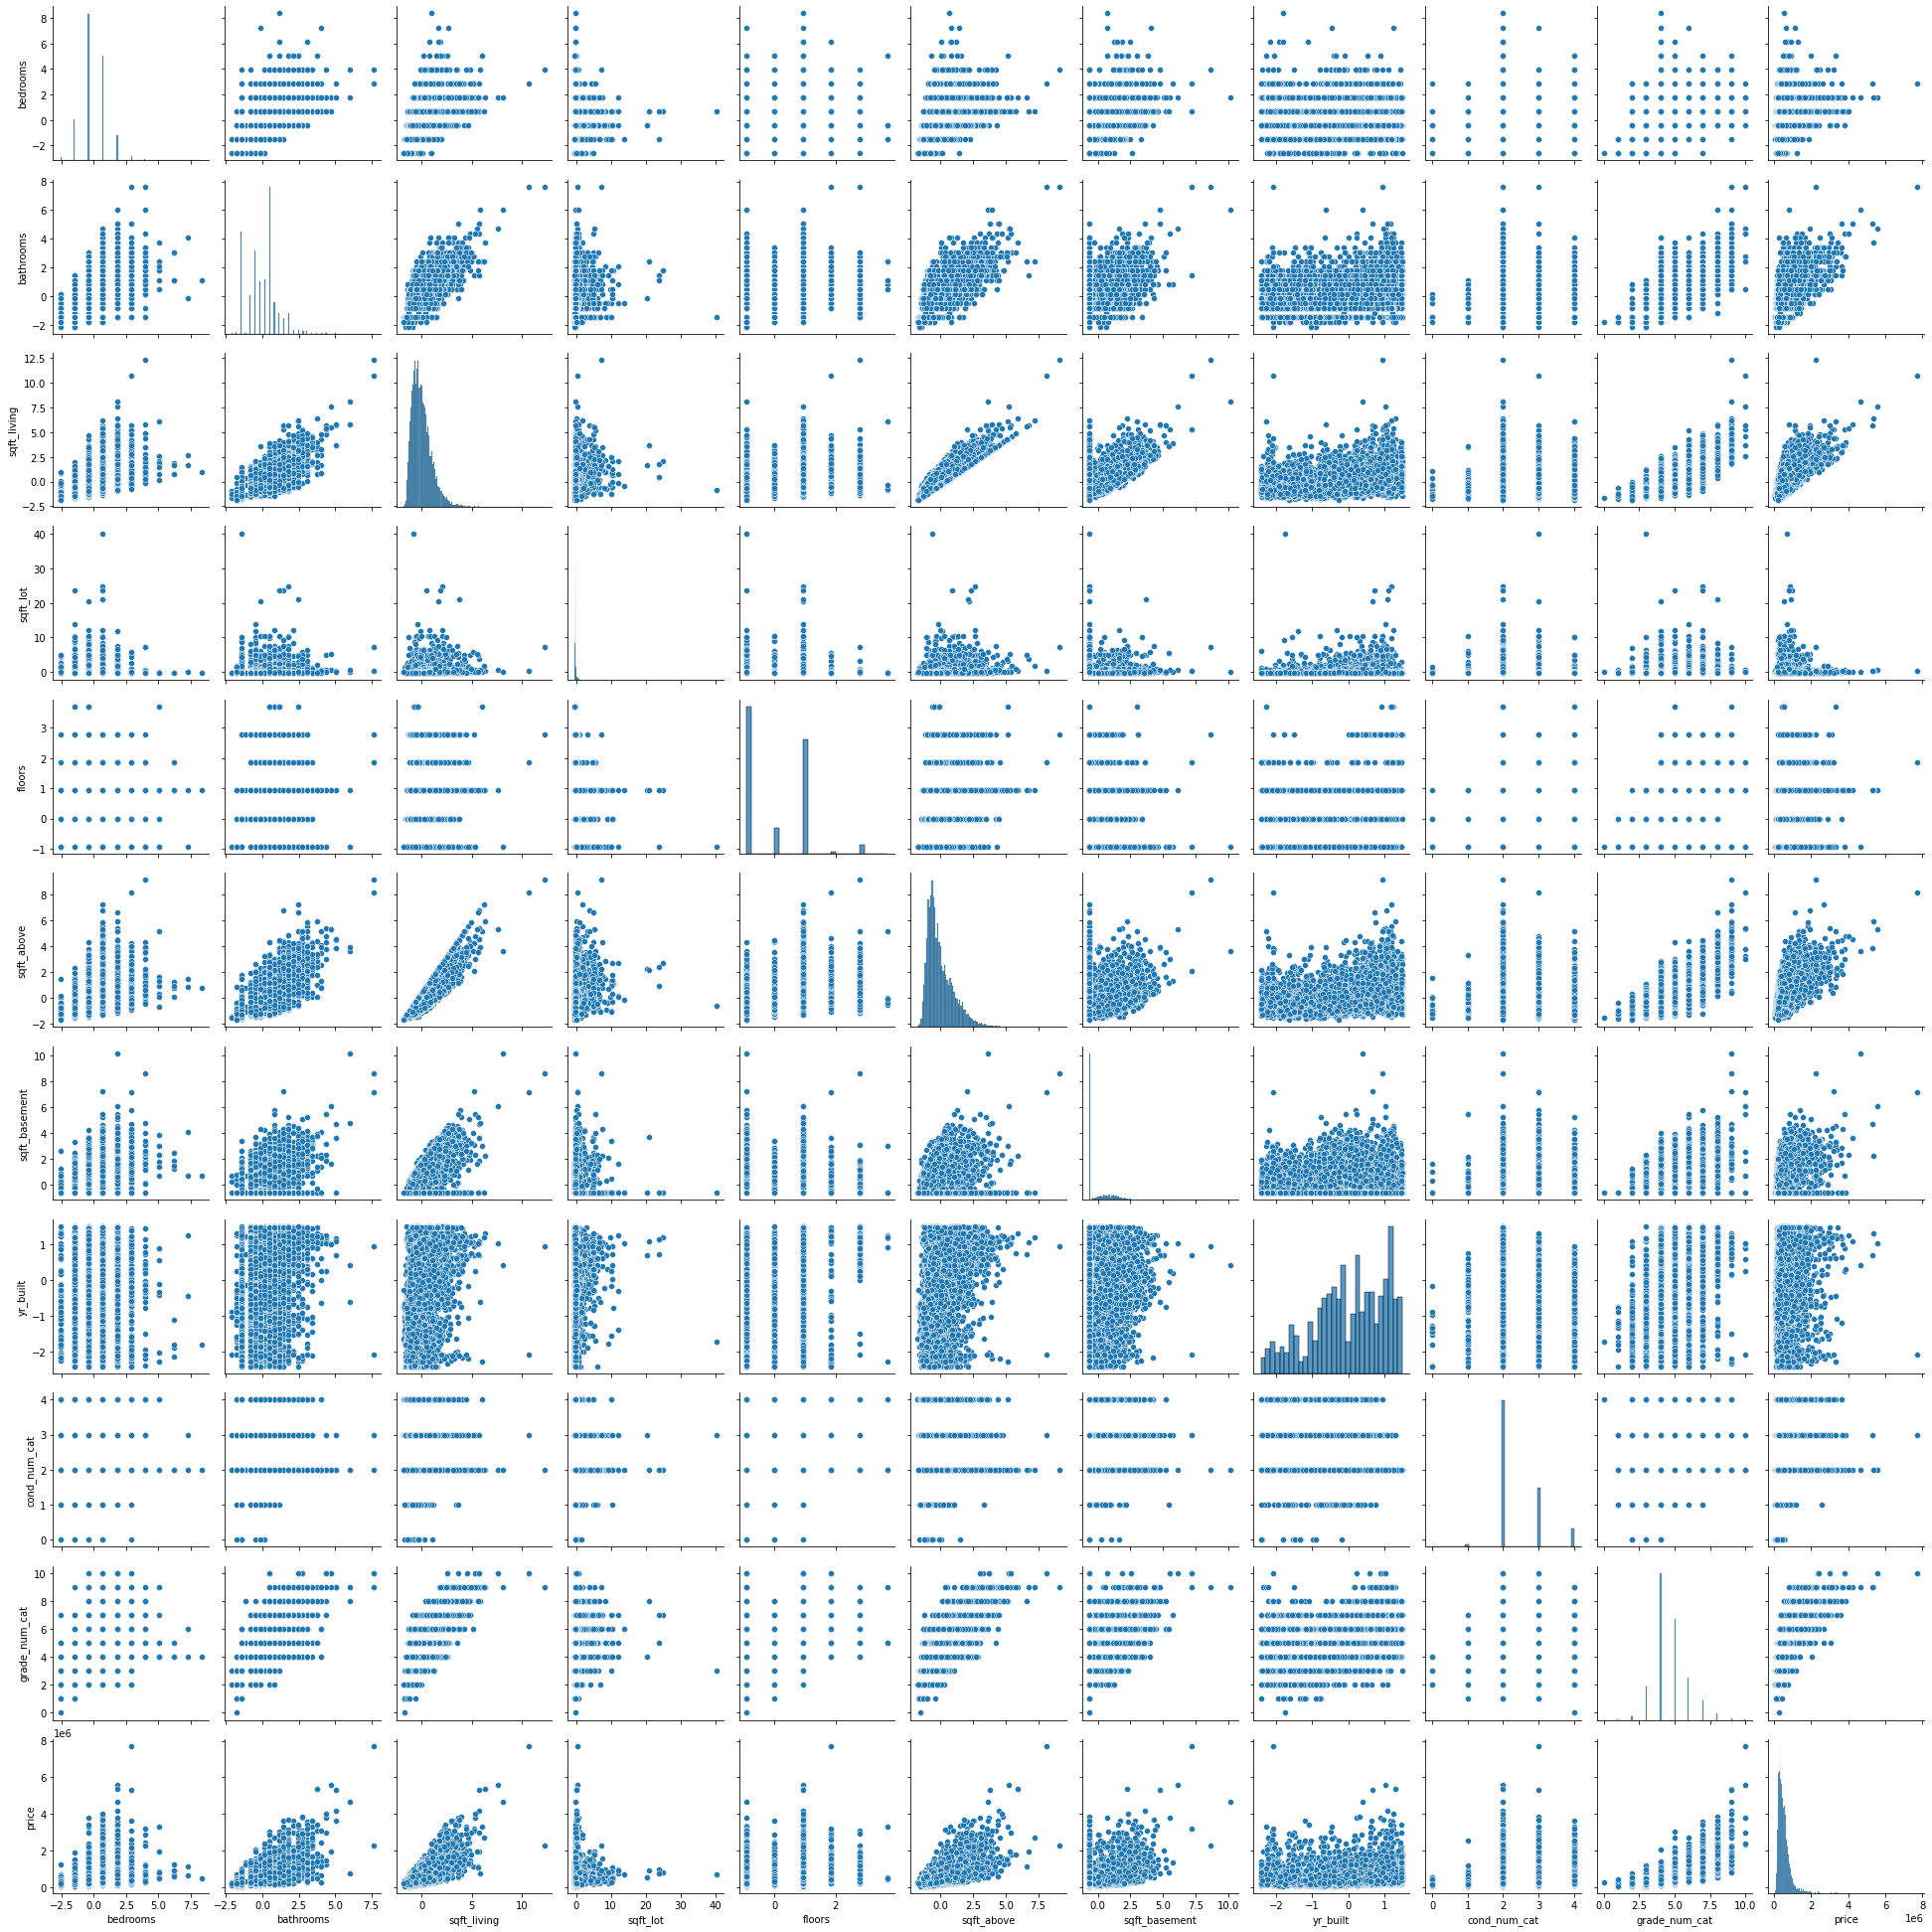

In [45]:
#pairplot
#to be able to understand the pairplot better
sns.pairplot(train_kch)
plt.show()

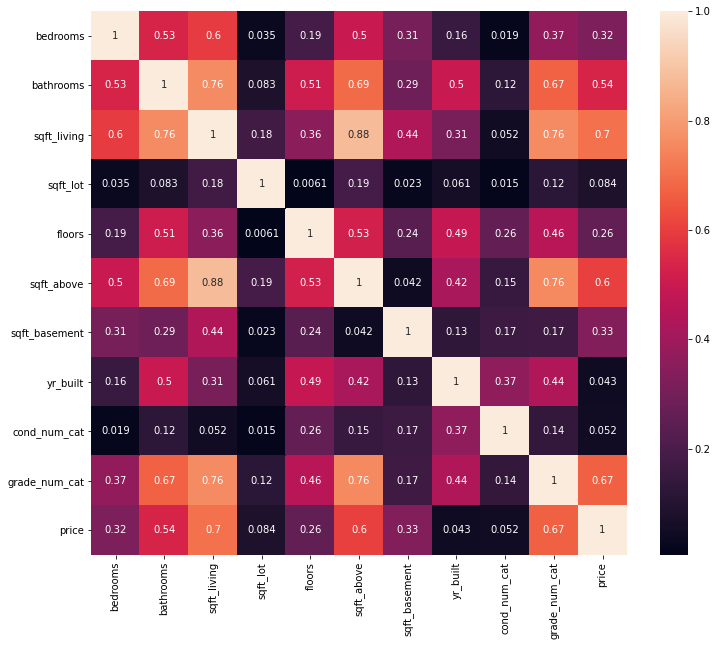

In [46]:
plt.figure(figsize=(12,10))
sns.heatmap(train_kch.corr().abs(), annot=True)
plt.show()

-----------------

## Preparing the test data for modeling

- dropping columns that were removed such as yr_renovated, zipcode
- dropping the nulls from waterfront
- adding the features that were added with the OneHotEncoder or maybe use Ordinal Encoder instead and drop that columns that are no longer needed (like Julian did with his group and use that instead so we don't have so many columns with condition and grade
- don't scale the y 
- don't fit the test data when scaling just transform it

In [ ]:
#trying to fix the sizes don't match error 
test_kch.drop(columns='yr_renovated', inplace=True)

#dropping missing values from waterfront
test_kch = test_kch.dropna().reset_index(drop=True)

#sanity check
test_kch.isnull().sum()

In [ ]:
#begining with the Dummy Regressor - the mean of y: price
from sklearn.dummy import DummyRegressor 

#defining X and y for train_kch
X_train_kch = train_kch.drop(columns='price')
y_train_kch = train_kch['price']

#defining X and y for test_kch
X_test_kch = test_kch.drop(columns='price')
y_test_kch = test_kch['price']

dummy_mean = DummyRegressor(strategy='mean').fit(X_train_kch, y_train_kch)
y_predict_dummy_mean = dummy_mean.predict(X_test_kch)

In [ ]:
y_test_kch.shape

In [ ]:
X_test_kch.shape

In [ ]:
#plotting the Dummy Regressor mean and predictions
plt.scatter(X_test_kch, y_test_kch)